# Crop Prediction

In [ ]:
import numpy as np
import torch
np.random.seed(42)

**Training Data**

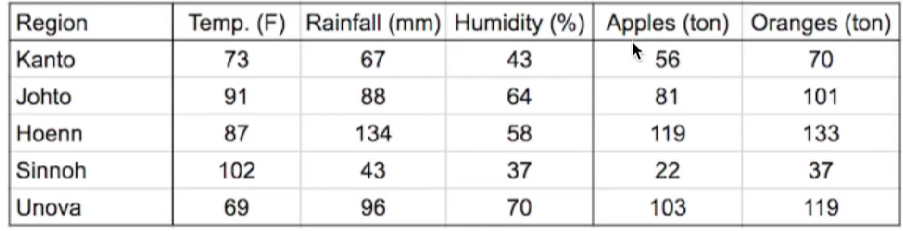

In [ ]:
# input temp, rainfall, humidity

inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]], dtype = 'float32')

In [ ]:
#inpur is a matrix 0f 5 X 3
print(inputs)
print(inputs.shape)

[[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]
(5, 3)


In [ ]:
# Targets (Apple, Oranges)

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype= 'float32')

In [ ]:
print(targets)
print(targets.shape)

[[ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]]
(5, 2)


**Converting numpy array to Tensors**

In [ ]:
# converting to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)



tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
print(inputs.shape)
print(targets.shape)

torch.Size([5, 3])
torch.Size([5, 2])


**Weights and Biases**

In [ ]:
# Weights and Biases

w = torch.randn(2,3, requires_grad =True)
b = torch.randn(2, requires_grad = True)

print(w)
print(b)

tensor([[ 0.5393,  1.3648,  1.0182],
        [-0.4032,  1.2591, -0.2432]], requires_grad=True)
tensor([ 0.1731, -0.4474], requires_grad=True)


In [ ]:
print(w.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([2])


**Our Model is basically doing the matrix multiplications**

input(5 X 3)* {Weight(2 X 3)}*Transpose + bias(1 X 2)

In [ ]:
def model(x):
  return x @ w.t() + b

In [ ]:
prediction = model(inputs)
print(prediction)

tensor([[174.7630,  44.0188],
        [234.5123,  58.0940],
        [289.0251, 119.0841],
        [151.5393,   3.5678],
        [239.6750,  75.5773]], grad_fn=<AddBackward0>)


In [ ]:
# actual targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
diff = prediction - targets
print(diff)
print(diff.numel()) # how much elemnt in the diff tensor

tensor([[118.7630, -25.9812],
        [153.5123, -42.9060],
        [170.0251, -13.9159],
        [129.5393, -33.4322],
        [136.6750, -43.4227]], grad_fn=<SubBackward0>)
10


*After Comparing with the predicted and target we can see that these are too far awat from the target value so we have to do some thing so that the model will learn.*

# loss Function

In [ ]:
def mse(pred, target):
  diff = pred - target
  loss = torch.sum(diff*diff)/diff.numel()
  return loss

loss = mse(prediction, targets)
print(loss)



tensor(10775.2578, grad_fn=<DivBackward0>)


# Compute the Gradient

In [ ]:
loss.backward()

In [ ]:
print(w)
print(w.grad)

tensor([[ 0.5393,  1.3648,  1.0182],
        [-0.4032,  1.2591, -0.2432]], requires_grad=True)
tensor([[12015.0195, 12588.1143,  7830.6523],
        [-2683.6021, -2597.4731, -1789.3760]])


In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)


tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# Optimization Algorithm

**Gradient Descent**

In [ ]:
# generate Predictions
prediction = model(inputs)
print(prediction)

tensor([[174.7630,  44.0188],
        [234.5123,  58.0940],
        [289.0251, 119.0841],
        [151.5393,   3.5678],
        [239.6750,  75.5773]], grad_fn=<AddBackward0>)


In [ ]:
# calculate the loss
loss = mse(prediction, targets)
print(loss)

tensor(10775.2578, grad_fn=<DivBackward0>)


In [ ]:
#compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[12015.0195, 12588.1143,  7830.6523],
        [-2683.6021, -2597.4731, -1789.3760]])
tensor([141.7030, -31.9316])


In [ ]:
# adjusting weights
lr = 1e-5
with torch.no_grad():
  w -= w.grad * lr
  b -= b.grad * lr
  w.grad.zero_()
  b.grad.zero_()
# new wirghst we got
print(w)
print(b)

tensor([[ 0.4192,  1.2389,  0.9399],
        [-0.3764,  1.2851, -0.2254]], requires_grad=True)
tensor([ 0.1717, -0.4471], requires_grad=True)


In [ ]:
# now ones again calculate the loss
prediction = model(inputs)
loss = mse(prediction, targets)
print(loss)

tensor(7303.5093, grad_fn=<DivBackward0>)


In [ ]:
#compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ 9891.9600, 10309.4902,  6423.9780],
        [-2222.8140, -2104.2148, -1484.4651]])
tensor([116.5256, -26.4695])


In [ ]:
# adjusting weights
lr = 1e-5
with torch.no_grad():
  w -= w.grad * lr
  b -= b.grad * lr
  w.grad.zero_()
  b.grad.zero_()
# new wirghst we got
print(w)
print(b)

tensor([[ 0.3202,  1.1358,  0.8756],
        [-0.3541,  1.3061, -0.2105]], requires_grad=True)
tensor([ 0.1705, -0.4468], requires_grad=True)


In [ ]:
# now ones again calculate the loss
prediction = model(inputs)
loss = mse(prediction, targets)
print(loss)

tensor(4963.6528, grad_fn=<DivBackward0>)


# Train for multiple epoch

In [ ]:
import torch
import numpy as np

# Input data: Temperature, Rainfall, Humidity
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Targets (Apple, Oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

# Converting inputs and targets to PyTorch tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Initialize weights and biases
w = torch.randn(2, 3, requires_grad=True)  # 2 output neurons, 3 input features
b = torch.randn(2, requires_grad=True)     # 2 output neurons

# Define the model
def model(x):
    return x @ w.t() + b

# Mean Squared Error loss function
def mse(pred, target):
    diff = pred - target
    loss = torch.sum(diff * diff) / diff.numel()
    return loss

# Training loop
lr = 1e-6
epochs = 100

for i in range(epochs):
    # Forward pass: compute prediction
    prediction = model(inputs)

    # Compute loss
    loss = mse(prediction, targets)

    # Backward pass: compute gradients
    loss.backward()

    # Update weights and biases in-place
    with torch.no_grad():
        w -= w.grad * lr  # In-place update for weights
        b -= b.grad * lr  # In-place update for biases

        # Zero the gradients after updating
        w.grad.zero_()
        b.grad.zero_()

    print(f"Epoch: {i+1}, Loss: {loss.item():.4f}")


Epoch: 1, Loss: 4185.7100
Epoch: 2, Loss: 4069.1743
Epoch: 3, Loss: 3956.7378
Epoch: 4, Loss: 3848.2551
Epoch: 5, Loss: 3743.5874
Epoch: 6, Loss: 3642.5962
Epoch: 7, Loss: 3545.1543
Epoch: 8, Loss: 3451.1333
Epoch: 9, Loss: 3360.4128
Epoch: 10, Loss: 3272.8765
Epoch: 11, Loss: 3188.4106
Epoch: 12, Loss: 3106.9058
Epoch: 13, Loss: 3028.2578
Epoch: 14, Loss: 2952.3645
Epoch: 15, Loss: 2879.1287
Epoch: 16, Loss: 2808.4561
Epoch: 17, Loss: 2740.2556
Epoch: 18, Loss: 2674.4387
Epoch: 19, Loss: 2610.9229
Epoch: 20, Loss: 2549.6243
Epoch: 21, Loss: 2490.4658
Epoch: 22, Loss: 2433.3704
Epoch: 23, Loss: 2378.2659
Epoch: 24, Loss: 2325.0806
Epoch: 25, Loss: 2273.7468
Epoch: 26, Loss: 2224.1997
Epoch: 27, Loss: 2176.3750
Epoch: 28, Loss: 2130.2122
Epoch: 29, Loss: 2085.6509
Epoch: 30, Loss: 2042.6361
Epoch: 31, Loss: 2001.1121
Epoch: 32, Loss: 1961.0261
Epoch: 33, Loss: 1922.3274
Epoch: 34, Loss: 1884.9661
Epoch: 35, Loss: 1848.8961
Epoch: 36, Loss: 1814.0696
Epoch: 37, Loss: 1780.4441
Epoch: 38,

In [ ]:
print(prediction)

tensor([[ 74.0922,  72.7220],
        [ 97.0696,  89.5355],
        [108.5639, 111.2630],
        [ 80.2442,  85.4651],
        [ 89.3984,  74.3187]], grad_fn=<AddBackward0>)


In [ ]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


# Built in Function

In [7]:
import torch.nn as nn
import numpy as np
import torch

In [8]:
input = torch.randint(80,120,(15,3), dtype = torch.float32 )
target = torch.randint(10, 20, (15,2),dtype = torch.float32 )
np.random.seed()

In [9]:
print(input)
print(target)

tensor([[ 97.,  96., 109.],
        [106.,  96.,  92.],
        [ 89.,  99.,  95.],
        [115., 108.,  83.],
        [ 91., 115., 106.],
        [ 92., 114.,  84.],
        [112., 111., 115.],
        [ 87.,  95., 117.],
        [101., 111., 101.],
        [ 93., 114.,  87.],
        [ 90., 119., 105.],
        [ 99.,  98.,  82.],
        [115.,  93.,  81.],
        [ 91., 104., 102.],
        [112.,  85., 100.]])
tensor([[13., 19.],
        [11., 11.],
        [16., 10.],
        [16., 10.],
        [14., 12.],
        [13., 12.],
        [15., 19.],
        [12., 19.],
        [14., 17.],
        [11., 16.],
        [15., 12.],
        [11., 12.],
        [12., 16.],
        [12., 16.],
        [10., 17.]])


In [13]:
from torch.utils.data import TensorDataset, DataLoader

In [14]:
#TensorDaraset
train_dataset = TensorDataset(input, target)
print(train_dataset[0:3])

(tensor([[ 97.,  96., 109.],
        [106.,  96.,  92.],
        [ 89.,  99.,  95.]]), tensor([[13., 19.],
        [11., 11.],
        [16., 10.]]))


In [15]:
#DataLoader
batch_size = 5
train_dataloader = DataLoader(train_dataset, batch_size, shuffle = True)

In [16]:
for xb , yb in train_dataloader:
  print(xb)
  print(yb)
  break
#here we are  getting batch of 5

tensor([[ 92., 114.,  84.],
        [ 99.,  98.,  82.],
        [ 93., 114.,  87.],
        [ 97.,  96., 109.],
        [115., 108.,  83.]])
tensor([[13., 12.],
        [11., 12.],
        [11., 16.],
        [13., 19.],
        [16., 10.]])


In [17]:
# Define Model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4419,  0.2941, -0.5035],
        [-0.3636, -0.5302, -0.2214]], requires_grad=True)
Parameter containing:
tensor([-0.3060,  0.1620], requires_grad=True)


In [19]:
prediction = model(input)
print(prediction)

tensor([[  15.9061, -110.1402],
        [  28.4425, -109.6487],
        [  20.3023, -105.7216],
        [  40.4797, -117.2905],
        [  20.3528, -117.3670],
        [  31.5775, -112.3292],
        [  23.9244, -124.8755],
        [   7.1653, -107.7450],
        [  26.1127, -117.7756],
        [  30.5089, -113.3571],
        [  21.5907, -118.9025],
        [  30.9724, -105.9494],
        [  37.0756, -108.8954],
        [  19.1320, -110.6496],
        [  23.8309, -107.7702]], grad_fn=<AddmmBackward0>)


In [20]:
# import nn.functional
import torch.nn.functional as F


In [22]:
# Define Loass Finction

loss_fun = F.mse_loss

In [23]:
loss = loss_fun(prediction, target)
print(loss)

tensor(8206.5693, grad_fn=<MseLossBackward0>)


**Optimizer**

In [25]:
# Define Optimizer
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Generate sample data
input = torch.randint(20, 50, (15, 3), dtype=torch.float32)  # Input tensor
target = torch.randint(10, 20, (15, 2), dtype=torch.float32)  # Target tensor

# Prepare data loader
train_dataset = TensorDataset(input, target)
batch_size = 5
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)

# Define the model
model = nn.Linear(3, 2)  # 3 input features, 2 output features

# Define loss function
loss_fun = F.mse_loss  # Mean Squared Error loss function

# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-6)

# Training loop
epochs = 500  # Number of epochs
for epoch in range(epochs):
    for xb, yb in train_dataloader:
        # Make predictions
        prediction = model(xb)

        # Calculate loss
        loss = loss_fun(prediction, yb)

        # Backpropagation
        loss.backward()

        # Update parameters(w,b)
        opt.step()

        # Zero the gradients after updating
        opt.zero_grad()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

print("Training complete.")


Epoch [10/500], Loss: 662.3905
Epoch [20/500], Loss: 484.7108
Epoch [30/500], Loss: 445.1470
Epoch [40/500], Loss: 382.3427
Epoch [50/500], Loss: 370.9727
Epoch [60/500], Loss: 242.5935
Epoch [70/500], Loss: 136.2569
Epoch [80/500], Loss: 196.9047
Epoch [90/500], Loss: 136.4404
Epoch [100/500], Loss: 118.4314
Epoch [110/500], Loss: 109.7357
Epoch [120/500], Loss: 75.8017
Epoch [130/500], Loss: 56.0607
Epoch [140/500], Loss: 59.6330
Epoch [150/500], Loss: 34.2095
Epoch [160/500], Loss: 60.0871
Epoch [170/500], Loss: 37.9924
Epoch [180/500], Loss: 43.1061
Epoch [190/500], Loss: 30.0200
Epoch [200/500], Loss: 35.6220
Epoch [210/500], Loss: 33.7347
Epoch [220/500], Loss: 16.7648
Epoch [230/500], Loss: 28.0236
Epoch [240/500], Loss: 8.3134
Epoch [250/500], Loss: 17.7563
Epoch [260/500], Loss: 19.6553
Epoch [270/500], Loss: 23.0267
Epoch [280/500], Loss: 25.7401
Epoch [290/500], Loss: 28.9089
Epoch [300/500], Loss: 22.0828
Epoch [310/500], Loss: 17.5605
Epoch [320/500], Loss: 18.3651
Epoch [

In [4]:
print(target)

tensor([[17., 14.],
        [19., 10.],
        [12., 17.],
        [10., 19.],
        [10., 14.],
        [11., 19.],
        [15., 10.],
        [18., 14.],
        [18., 14.],
        [16., 13.],
        [10., 11.],
        [16., 17.],
        [12., 16.],
        [14., 11.],
        [10., 18.]])


In [5]:
prediction = model(input)
print(prediction)


tensor([[10.3152, 12.1163],
        [10.4510, 11.4062],
        [13.5871, 15.2956],
        [10.2683, 11.4900],
        [12.1506, 14.2893],
        [14.2034, 15.5832],
        [17.7214, 17.8532],
        [18.3186, 17.3641],
        [20.3262, 18.8947],
        [10.5367, 13.0837],
        [11.6424, 14.0645],
        [14.2101, 14.9179],
        [ 8.5255, 10.9518],
        [12.7225, 13.1864],
        [18.5808, 16.7506]], grad_fn=<AddmmBackward0>)
